In [1]:
import itertools
from math import sqrt
import multiprocessing as mp
from multiprocessing import Pool
#mp.set_start_method('spawn')

import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt

import numpy as np

font = {'family' : 'Source Code Pro',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]=8,8
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

Defines and evaluates denominators in the RG equations. The denominators in the RG equations are

$d_0 = \omega - \frac{1}{2}D - \frac{U}{2} + \frac{K}{2}$

$d_1 = \omega - \frac{1}{2}D + \frac{U}{2} + \frac{J}{2}$

$d_2 = \omega - \frac{1}{2}D + \frac{J}{4} + \frac{K}{4}$

In [2]:
def den(w, D, U, J, K):
    d0 = w - 0.5 * D - U/2 + K/2
    d1 = w - 0.5 * D + U/2 + J/2
    d2 = w - 0.5 * D + J/4 + K/4
    return d0, d1, d2

# RG Equations

The RG equations for the symmetric spin-charge Anderson-Kondo are 

$\Delta U = 4|V|^2 (\frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{U}{2} + \frac{1}{2}J}  - \frac{1}{\omega - \frac{\epsilon_q}{2} - \frac{U}{2} + \frac{1}{2}K}) + \sum_{k<\Lambda_j} \frac{3}{4}\frac{K^2 - J^2}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K}$

$\Delta V = \frac{V K}{16}\left( \frac{1}{\omega - \frac{\epsilon_q}{2} - \frac{U}{2} + \frac{1}{2}K} + \frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K} \right) - \frac{3VJ}{4}\left( \frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{U}{2} + \frac{1}{2}J} + \frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K} \right)$

$\Delta J = - \frac{J^2}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K}$

$\Delta K = - \frac{K^2}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K}$

The following equation accepts the coupling values at the $j^{th}$ step of the RG, applies the RG equations on them and returns the couplings for the $(j-1)^{th}$ step. _If any coupling changes sign, it is set to 0._

In [3]:

def rg(w, D, U, V, J, K):
    dens = den(w, D, U, J, K)
    deltaU = -4 * V**2 * (1/dens[0] - 1/dens[1]) - (3* (J**2 - K**2)/8) * D / dens[2]
    deltaV = (1/16) * K * V * (1/dens[0] - 1/dens[2]) - (3/4) * J * V * (1/dens[1] + 1/dens[2])
    deltaJ = - J**2 / dens[2]
    deltaK = - K**2 / dens[2]

    U = 0 if (U + (D**0.5)*deltaU) * U <= 0 else U + (D**0.5)*deltaU
    V = 0 if (V + (D**0.5)*deltaV) * V <= 0 else V + (D**0.5)*deltaV
    J = 0 if (J + (D**0.5)*deltaJ) * J <= 0 else J + (D**0.5)*deltaJ
    K = 0 if (K + (D**0.5)*deltaK) * K <= 0 else K + (D**0.5)*deltaK

    return U, V, J, K

The following function does one complete RG for a given set of bare couplings and returns arrays of the flowing couplings.

In [4]:
def complete_RG(w, D0, U0, V0, J0, K0, N=10):
    U = U0
    V = V0
    J = J0
    K = K0
    N = D0 * 10
    old_den = den(w, D0, U, J, K)[2]
    x, y1, y2, y3, y4 = [], [], [], [], []
    for D in np.linspace(D0, 0, N):
        x.append(D)
        y1.append(U)
        y2.append(J)
        y3.append(K)
        y4.append(V)
        new_den = den(w, D, U, J, K)[2]
        if old_den * new_den <= 0:
            return x, y1, y2, y3
        old_den = new_den
        U, V, J, K = rg(w, D, U, V, J, K)
    return x, y1, y2, y3, y4

# 1. $V=0$

First we will look at the simplified case of $V=0$. Since the RG equation for $V$ involves $V$, it will not flow. We need to look only at $U$, $J$ and $K$. Depending on the value of $\omega$, the denominator can be either positive or negative. We look at the two cases separately.

## a. $\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K>0$ (high $\omega$):

These aren't truly URG fixed points because the denominator will not converge towards zero.

### i. $J=K$

Since $\Delta U \propto K^2 - J^2$, $U$ will be marginal here.

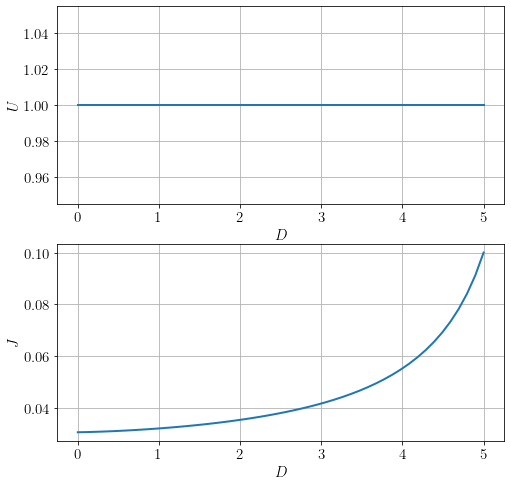

In [5]:
w = 5
D0 = 5
U0 = 1
J0 = K0 = 0.1
V0 = 0
x, y1, y2 = complete_RG(w, D0, U0, V0, J0, K0)[0:3]
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

### ii. $J > K$

Since $\Delta U \propto K^2 - J^2$, $U$ will be irrelevant here.

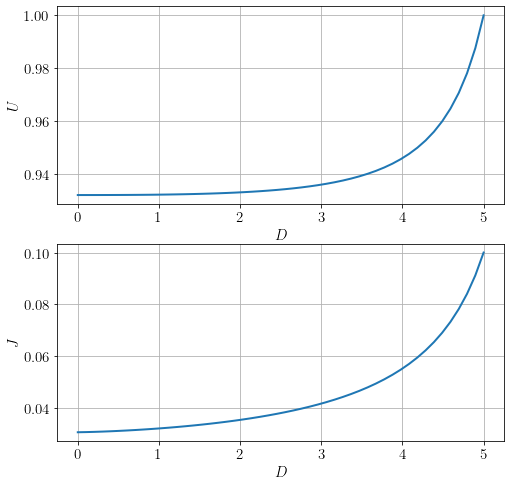

In [6]:
w = 5
D0 = 5
U0 = 1
J0 = 0.1
K0 = 0.05
V0 = 0
x, y1, y2 = complete_RG(w, D0, U0, V0, J0, K0)[0:3]
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

### iii. $J < K$

Since $\Delta U \propto K^2 - J^2$, $U$ will be relevant here.

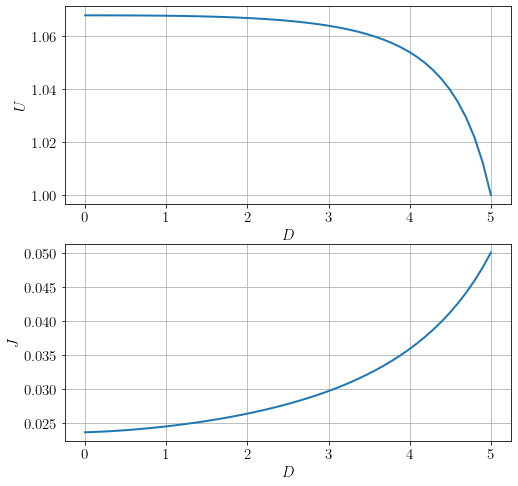

In [7]:
w = 5
D0 = 5
U0 = 1
J0 = 0.05
K0 = 0.1
V0 = 0
x, y1, y2 = complete_RG(w, D0, U0, V0, J0, K0)[0:3]
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

## b. $\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K<0$ (low $\omega$):

This is the regime where we achieve true strong-coupling fixed points in $J,K$. The signature of $K^2 - J^2$ will determine whether $U$ is relevant or irrelevant.

### i. $J>K$

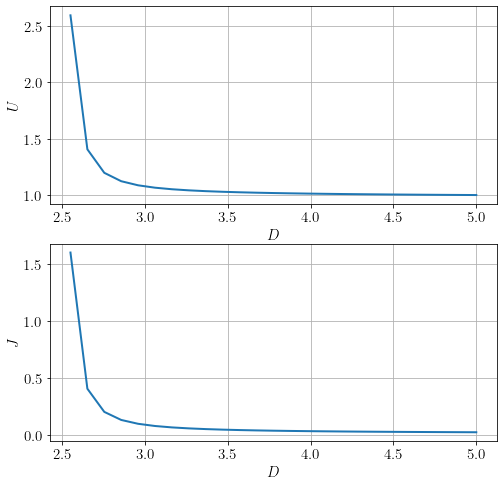

In [8]:
w = 1
D0 = 5
U0 = 1
J0 = 0.02
K0 = 0.01
V0 = 0
x, y1, y2 = complete_RG(w, D0, U0, V0, J0, K0)[0:3]
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

### i. $J<K$

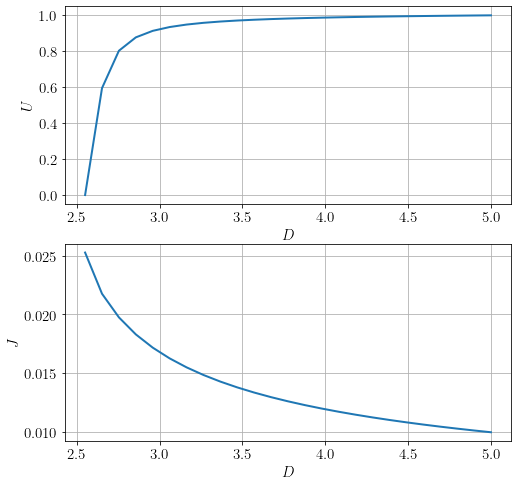

In [9]:
w = 1
D0 = 5
U0 = 1
J0 = 0.01
K0 = 0.02
V0 = 0
x, y1, y2 = complete_RG(w, D0, U0, V0, J0, K0)[0:3]
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

To wrap up the $V=0$ case, we look at an RG-invariant:

$\frac{\Delta J}{\Delta K} = \frac{J^2}{K^2} \implies \frac{1}{J} - \frac{1}{K} = \frac{1}{J_0} - \frac{1}{K_0}$

Note that this is an invariant even when $V$ is turned on.

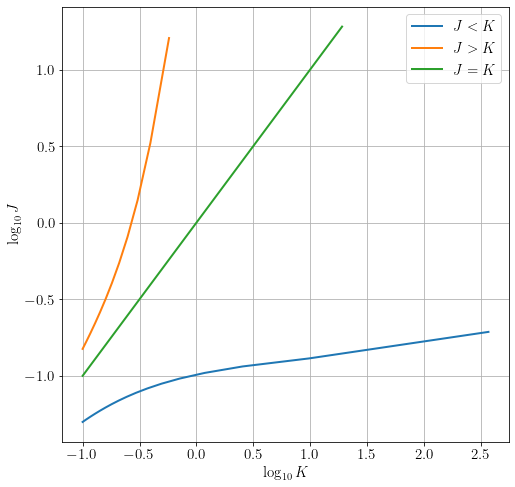

In [10]:
w = 1
D0 = 10
U0 = 1
J0 = 0.05
K0 = 0.1
V0 = 0
x, y1, y2, y3 = complete_RG(w, D0, U0, V0, J0, K0)[0:4]
plt.xlabel(r"$\log_{10}K$")
plt.ylabel(r"$\log_{10}J$")
plt.plot(np.log10(y3), np.log10(y2), label=r'$J<K$')
J0 = 0.15
K0 = 0.1
x, y1, y2, y3 = complete_RG(w, D0, U0, V0, J0, K0)
plt.plot(np.log10(y3), np.log10(y2), label=r'$J>K$')
J0 = 0.1
K0 = 0.1
x, y1, y2, y3 = complete_RG(w, D0, U0, V0, J0, K0)
plt.plot(np.log10(y3), np.log10(y2), label=r'$J=K$')
plt.legend()
plt.show()

## Phase Diagram

<img src="../figures/phases.png" style="width:500px">

# 2. $V > 0$

The inclusion of $V$ will mean that there will not by any sharply defined phase of $U^*$ any more. We will still be working in the regime where $J,K$ flow to strong-coupling, and since those RG equations do not depend on $V$, their flows are unchanged. The behaviour of $U$ will get complicated however. To make 
sense, we will see how the total (over a range of $\omega$ and bare $U$) number of fixed points where $U^* > U_0$ and the total number of fixed points where $U^* < U_0$, in each of the four quadrants of the phase diagram, varies against the bare value $V_0$.

## a. Behaviour of distribution of fixed points as a function of bare $V$

We can classify the fixed points into two classes: $U*=0$ and $U^* \neq 0$. The number of fixed points in each class for $V=0$ has already been clarified in the $V=0$ section, specially in the phase diagram. We will first check how this distribution varies as a function of $V$, in each quadrant.

In [11]:
def count_fp(D0, V0, J0, K0, sign=1, delta=0.05):
    w_range = np.arange(-D0/2, D0/2, delta)
    U_range = np.arange(sign*delta, sign*(D0/2 + delta), sign*delta)
    data = itertools.product(w_range, [D0], U_range, [V0], [J0], [K0])
    count = np.zeros(2)
    for outp in Pool(processes=10).starmap(complete_RG, data):
        U = outp[1]
        U_fp = U[-1]
        U0 = U[0]
        count += [1, 0] if U_fp == 0 else [0, 1]
    return count

def plot_count(J0, K0, sign, title, D0=10):
    V0_range = np.arange(0,0.5,0.02)
    c0, c1 = [], []
    for V0 in V0_range:
        print (V0)
        count = np.log10(count_fp(D0, V0, J0, K0, sign))
        c0.append(count[0])
        c1.append(count[1])

    plt.plot(V0_range, c0, marker=".", color='r', label=r"$U^*=0$" )
    plt.plot(V0_range, c1, marker=".", color='b', label=r"$U^* \neq 0$")
    plt.legend()
    plt.title(title)
    plt.xlabel(r"$V_0$")
    plt.ylabel(r"log of number of fixed points")
    plt.show()


plot_count(0.4, 0.3, 1, r"first quadrant")
plot_count(0.3, 0.4, 1, r"second quadrant")
plot_count(0.3, 0.4, -1, r"third quadrant")
plot_count(0.4, 0.3, -1, r"fourth quadrant")

## b. Change in the fraction of irrelevant fixed points under increase in $D$

Next we will see how the ratio of number of fixed points in each class varies as we increase the bandwidth, for a particular $V \sim \frac{D_0}{5}$ in the stable region.

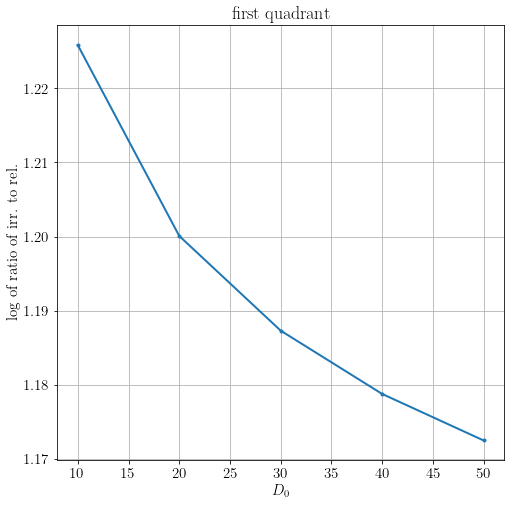

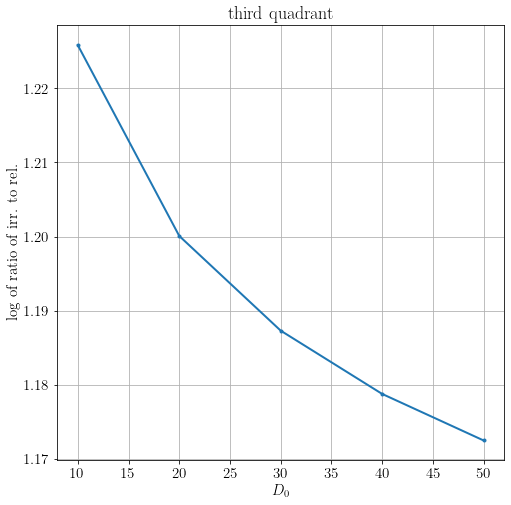

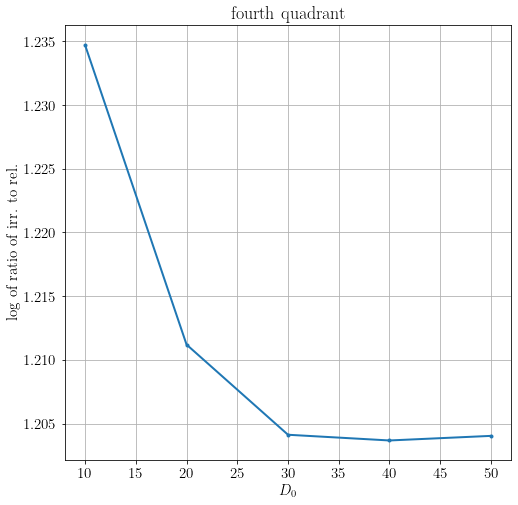

In [18]:
def plot_frac(J0, K0, sign, title):
    D0_range = range(10,60,10)
    frac = []
    for D0 in D0_range:
        V0 = 10
        count = np.log10(count_fp(D0, V0, J0, K0, sign))
        frac.append(count[0]/count[1])
5
    plt.plot(D0_range, frac, marker=".")
    plt.title(title)
    plt.xlabel(r"$D_0$")
    plt.ylabel(r"log of ratio of irr. to rel.")
    plt.show()


plot_frac(0.4, 0.3, 1, r"first quadrant")
plot_frac(0.3, 0.4, 1, r"second quadrant")
plot_frac(0.3, 0.4, -1, r"third quadrant")
plot_frac(0.4, 0.3, -1, r"fourth quadrant")